# Opdracht 16

Train a decision tree to predict one of the categorical columns of your own dataset

- Split your dataset into a train (70%) and test (30%) set.
- Use the train set to fit a DecisionTreeClassifier. You are free to choose which columns you want to use as feature variables and you are also free to choose the max_depth of the tree
- Use your decision tree model to make predictions for both the train and test set
- Calculate the accuracy for both the train set predictions and test set predictions
- Is the accuracy different? Did you expect this difference
- Use the plot_tree function above to create a plot of the decision tree. Take a few minutes to analyse the decision tree. Do you understand the tree

In [1]:
import pandas as pd

import graphviz

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [2]:
grades = pd.read_csv("StudentsPerformance.csv")
grades.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [3]:
sp_train, sp_test = train_test_split(grades, test_size=0.3)

sp_train = sp_train.dropna()
sp_train = sp_train.dropna()

In [4]:
features = ["math score", "reading score", "writing score"]
dt = DecisionTreeClassifier(max_depth=5)
dt.fit(sp_train[features], sp_train["parental level of education"])

DecisionTreeClassifier(max_depth=5)

In [5]:
 def plot_tree_classification(model, features, class_names):
    dot_data = tree.export_graphviz(model, out_file=None,
                                   feature_names = features,
                                   class_names= class_names,
                                   filled=True, rounded = True,
                                   special_characters = True)
    graph = graphviz.Source(dot_data)
    graph.render("decision_tree")
    return graph

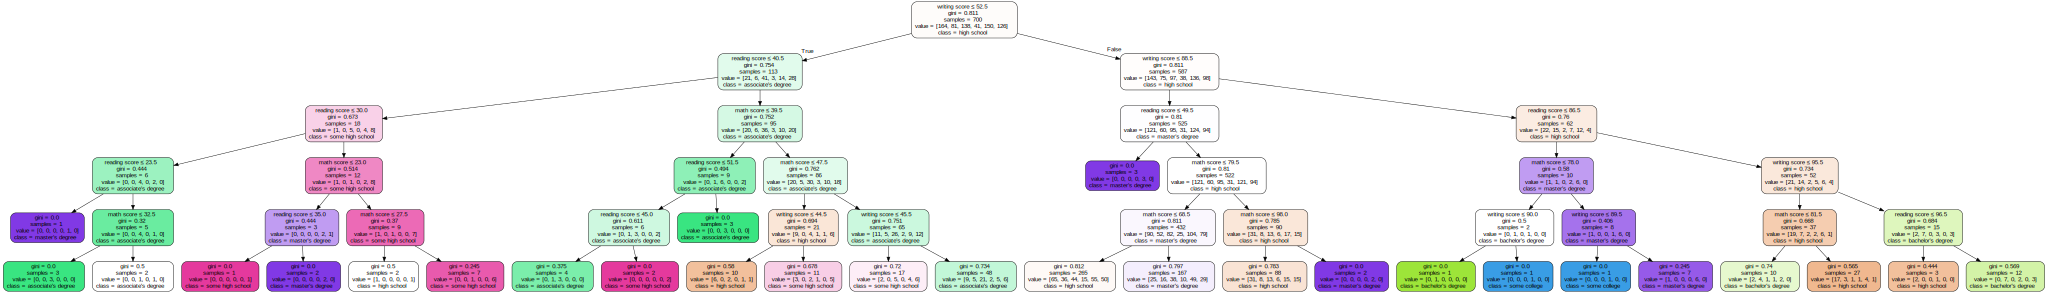

In [6]:
plot_tree_classification(dt, features, sp_train["parental level of education"].unique())

In [7]:
def calculate_accuracy(predictions, actuals):
    if(len(predictions) != len(actuals)):
        raise Exeption("The amount of predictions did not equal the amount of actuals")
        
    return (predictions == actuals).sum() / len(actuals)

In [8]:
predictions = dt.predict(sp_train[features])
calculate_accuracy(predictions, sp_train['parental level of education'])

0.35714285714285715

In [9]:
predictions = dt.predict(sp_test[features])
calculate_accuracy(predictions, sp_test['parental level of education'])

0.21

Er is hier een vrij groot verschil van 11% tussen de train en test sets te zien. 
Door middel van de behaalde cijfers is het enorm lastig in te schatten wat de educatie van de ouders moet zijn geweest. Er zit maar een enorm klein verband tussen.